# Predictive Analysis : Prediksi Penyakit Kanker Payudara

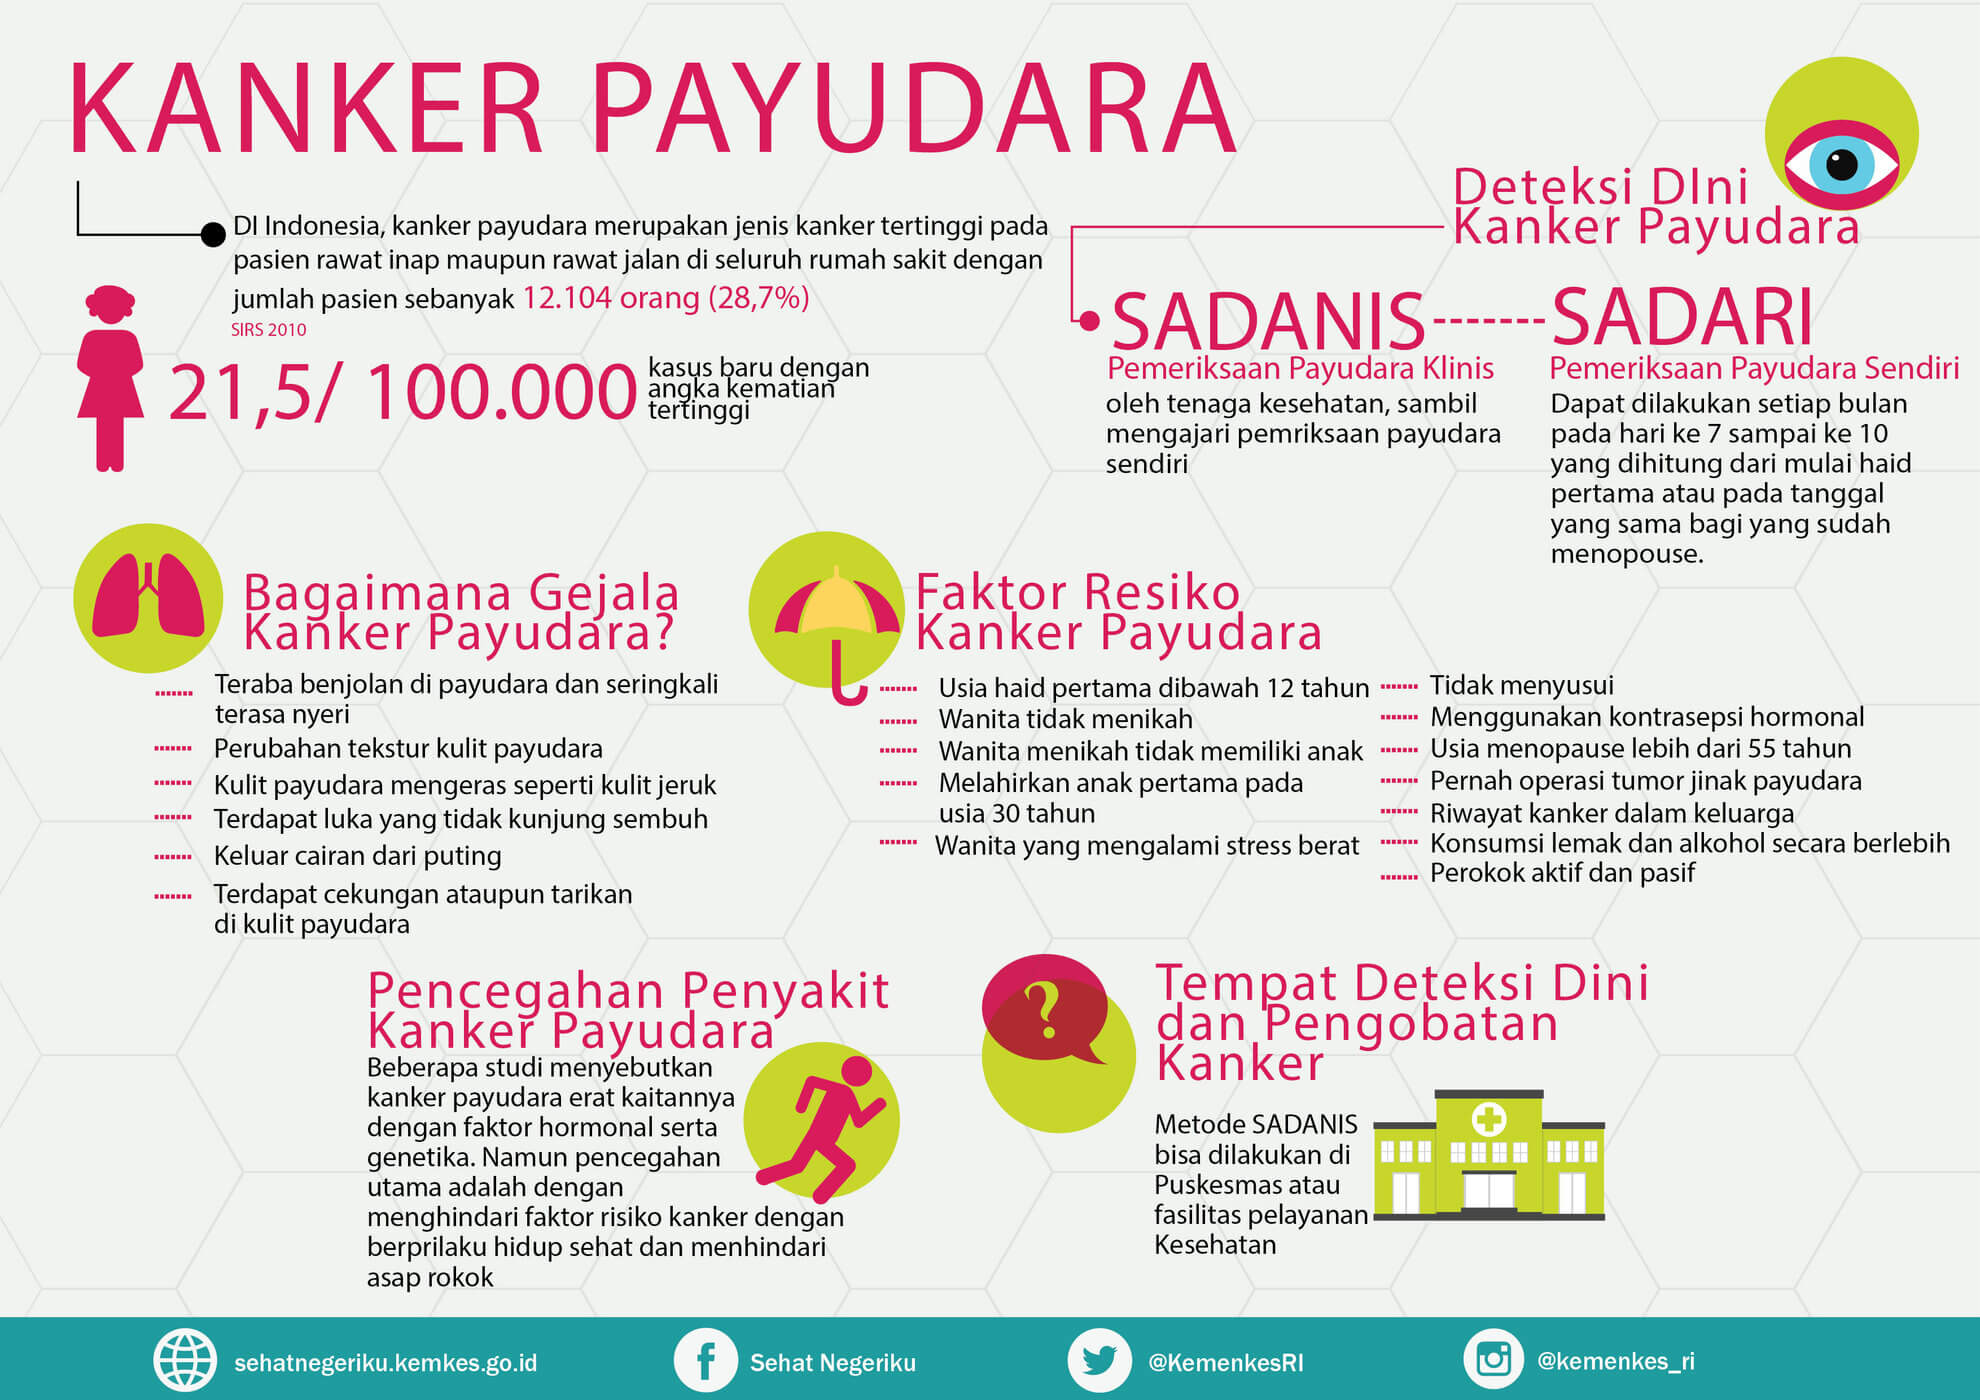

# 1. Link CSV dan Dataset



[link Dataset : Sumber Kaggle](https://drive.google.com/uc?export=download&id=1EIHwkmZ1ILGtz2Aqzw3hH5A6rnJsAN5_)


[link Project : Sumber Kaggle](https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset)

# 2. Mengimpor pustaka/modul python yang dibutuhkan

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

# Untuk pembuatan model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# 3. Data Understanding

## 3.1 Memuat Data pada sebuah Dataframe menggunakan pandas

In [2]:
url = "https://drive.google.com/uc?export=download&id=1EIHwkmZ1ILGtz2Aqzw3hH5A6rnJsAN5_"
df = pd.read_csv(url)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## 3.2 Memuat Info/type kolom pada dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# Menghitung jumlah data kosong pada setiap kolom
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
# Memuat ukuran shape pada dataframe
df.shape

(569, 32)

In [6]:
#menghapus kolom yang tidak diperlukan
df.drop(['id'], axis=1, inplace=True)


memuat hitungan rata-rata dan sbgnya pada variabel data

In [7]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## 3.3 Visualisasi Data

In [8]:
# membagi dataset menjadi 2 bagian yaitu kategorial dan numerik
categorical_features = ['diagnosis']
numerical_features = [
                      'radius_mean',
                      'texture_mean',
                      'perimeter_mean',
                      'area_mean',
                      'smoothness_mean',
                      'compactness_mean',
                      'concavity_mean',
                      'concave points_mean',
                      'symmetry_mean',
                      'fractal_dimension_mean',
                      'radius_se',
                      'texture_se',
                      'perimeter_se',
                      'area_se',
                      'smoothness_se',
                      'compactness_se',
                      'concavity_se',
                      'concave points_se',
                      'symmetry_se',
                      'fractal_dimension_se',
                      'radius_worst',
                      'texture_worst',
                      'perimeter_worst',
                      'area_worst',
                      'smoothness_worst',
                      'compactness_worst',
                      'concavity_worst',
                      'concave points_worst',
                      'symmetry_worst',
                      'fractal_dimension_worst'
                      ]

### 3.3.1 Distribusi Kolom Kategorial

           jumlah sampel  persentase
diagnosis                           
B                    357        62.7
M                    212        37.3


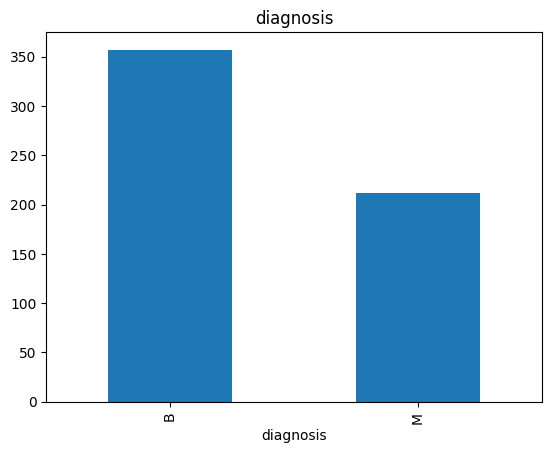

In [9]:
feature = categorical_features[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
data = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(data)
count.plot(kind='bar', title=feature);

### 3.3.2 Distribusi Kolom Numerik

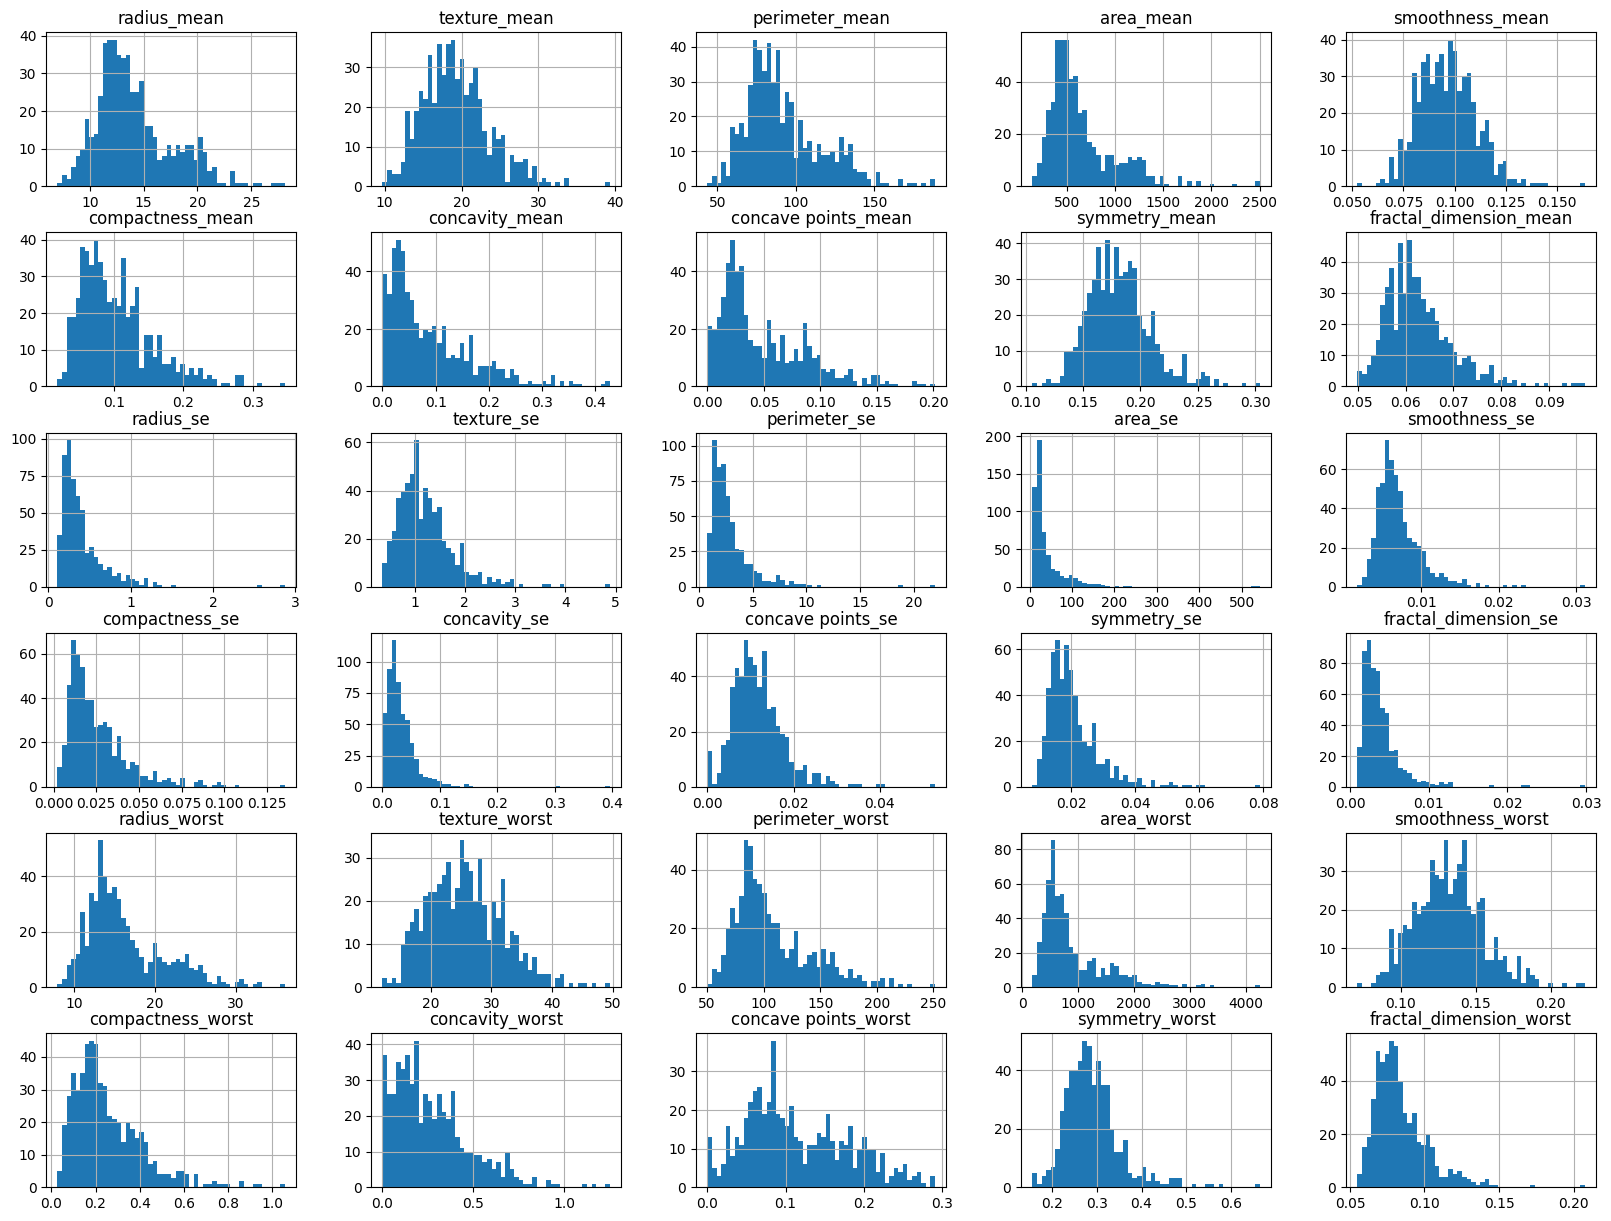

In [10]:
df.hist(bins=50, figsize=(20,15))
plt.show()

### 3.3.3 Korelasi pada tiap kolom

Text(0.5, 1.0, 'Correlation Matrix for Numeric Features')

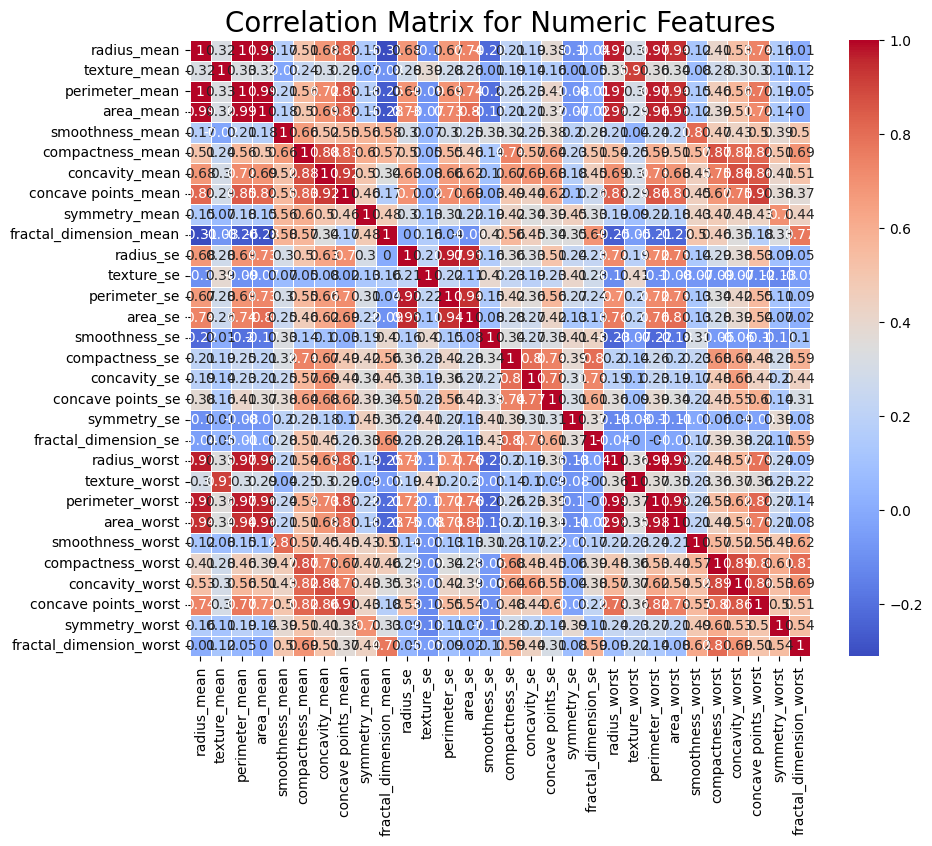

In [11]:
numeric_features = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))
correlation_matrix = numeric_features.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix for Numeric Features", size=20)

# 4. Persiapan Data (Data Preparation)

### 4.1 Melakukan pengecekan terhadap kolom diagnosis(target) yang bertipe object
*B* yang ditandai sebagai **Kanker Jinak** dan *M* ditandai sebagai **Kanker Ganas**

In [12]:
print("Unique Values for Diagnosis", df['diagnosis'].unique())

Unique Values for Diagnosis ['M' 'B']


In [13]:
oh = OneHotEncoder()

### 4.2 Melakukan mapping terhadap kolom diagnosis dari type object ke numerik agar bisa dibaca mesin

In [14]:
diagnosis_mapping = {'B': 0, 'M': 1}
df['diagnosis'] = df['diagnosis'].map(diagnosis_mapping)

df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### 4.3 Melakukan perhitungan jumlah baris terhadap kolom target

In [15]:
df.diagnosis.value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

### 4.4 Melakukan pembagian dataset dengan train_test_split

In [16]:
X = df.drop('diagnosis',axis=1)
y = df['diagnosis']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

menghitung banyaknya data latih dan data test

In [18]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 569
Total # of sample in train dataset: 455
Total # of sample in test dataset: 114


### 4.6 Melakukan Standard Scaler

In [19]:
sc=StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 5. Pembuatan Model

In [20]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['RandomForest', 'KNN', 'Boosting'])

### 5.1 Algoritma Random Forest

In [21]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier()

In [22]:
# Pengujian model terhadap data test
RF_pred = RF.predict(X_test)

In [23]:
accuracy_score(y_test, RF_pred)

0.9649122807017544

In [24]:
RF_cr = classification_report(y_test, RF_pred, output_dict=True)
pd.DataFrame(RF_cr).transpose()

,precision,recall,f1-score,support
0,0.955882,0.984848,0.970149,66.000000
1,0.978261,0.937500,0.957447,48.000000
accuracy,0.964912,0.964912,0.964912,0.964912
macro avg,0.967072,0.961174,0.963798,114.000000
weighted avg,0.965305,0.964912,0.964801,114.000000


### 5.2 Algoritma K-Nearest Neighbor

In [25]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [26]:
# Pengujian model terhadap data test
KNN_pred = KNN.predict(X_test)

In [27]:
accuracy_score(y_test, KNN_pred)

0.9649122807017544

In [28]:
KNN_cr = classification_report(y_test, KNN_pred, output_dict=True)
pd.DataFrame(KNN_cr).transpose()

,precision,recall,f1-score,support
0,0.942857,1.000000,0.970588,66.000000
1,1.000000,0.916667,0.956522,48.000000
accuracy,0.964912,0.964912,0.964912,0.964912
macro avg,0.971429,0.958333,0.963555,114.000000
weighted avg,0.966917,0.964912,0.964666,114.000000


# 6. Evaluasi Model

### 6.1 Perbandingan metriks antara model

In [29]:
RF_cr['accuracy']

0.9649122807017544

In [30]:
# Memasukkan hasil laporan klasifikasi model pada dataframe
metrics = pd.DataFrame({'accuracy' : [RF_cr['accuracy'], KNN_cr['accuracy']],
                        'f1-score_0' : [RF_cr['0']['f1-score'],KNN_cr['0']['f1-score']],
                        'precision_0' : [RF_cr['0']['precision'],KNN_cr['0']['precision']],
                        'recall_0' : [RF_cr['0']['recall'],KNN_cr['0']['recall']],
                        'f1-score_1' : [RF_cr['1']['f1-score'],KNN_cr['1']['f1-score']],
                        'precision_1' : [RF_cr['1']['precision'],KNN_cr['1']['precision']],
                        'recall_1' : [RF_cr['1']['recall'],KNN_cr['1']['recall']]},
                        index=['RF','KNN'])
multiheader = [('','accuracy'),
               ('0', 'f1-score'),
               ('0', 'precision'),
               ('0', 'recall'),
               ('1', 'f1-score'),
               ('1', 'precision'),
               ('1', 'recall')]
metrics.columns = pd.MultiIndex.from_tuples(multiheader)
# Menampilkan dataframe
metrics

0                             1                    
     accuracy  f1-score precision    recall  f1-score precision    recall
RF   0.964912  0.970149  0.955882  0.984848  0.957447  0.978261  0.937500
KNN  0.964912  0.970588  0.942857  1.000000  0.956522  1.000000  0.916667

# 6.2 Confussion Matrix

### 6.2.1 Visualisasi Algoritma Random Forest

<Axes: >

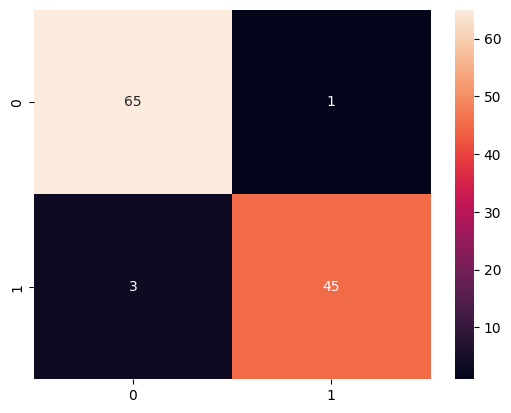

In [31]:
RF_cm = confusion_matrix(y_test,RF_pred)
sns.heatmap(RF_cm,annot=True,fmt="d")

### 6.2.2 Visualisasi Algoritma K-Nearest Neighbor

<Axes: >

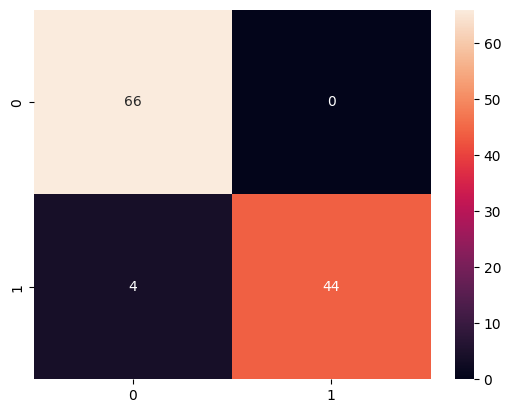

In [32]:
KNN_cm = confusion_matrix(y_test,KNN_pred)
sns.heatmap(KNN_cm,annot=True,fmt="d")